
***
***

# R2.07
## TP5. Coloration
***
***

Le but de ce TP est d'implémenter la coloration naïve de graphe, puis de voir ses limites
***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

On rappelle une fonction vue au TP 2

In [2]:
def neighbours(A,v):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param v: the considered vertex
    :type v: integer
    :return:  the array of (out-)neighbours of v in the graph whose adjacency matrix is A
    :rtype:  an array of integer
    """

    n = A.shape[0]
    neighbours=[]
    
    for i in range(n):
        if A[v][i] == 1:
            neighbours.append(i)

    return np.where(A[v]==1)[0]




### Coloration Naïve
***
**To Do:**

**_question 1_**

**a**  Écrire une fonction revoyant le minimum des éléments d'une liste (triée) <tt> l1</tt> parmi les éléments n'appartenant pas à la liste  <tt> l2</tt>


**b**  Implémenter l'algorithme de coloration naïve de graphes

_On prendra un ordre aléatoire pour le traitement des sommets_





In [3]:
def MinCol(col,colneigh):
    """
     Return the minimum among col of element which do not belong to colneigh

    :param col,colneigh: colours
    :type col,colneigh: 2 one dimensional np array of int
    :return c:  minimal admissible colour
    :rtype:   int
    """

    for i in range(col.shape[0]):
        if col[i] not in colneigh:
            return col[i]
    
    return -1

        
print(MinCol(np.arange(10),np.array([0,1,2])))

print(MinCol(np.arange(10),np.array([1,2])))

print(MinCol(np.arange(10),np.array([0,2])))


def NaiveCol(A):
    """
     Return a (naive, possibly sub-optimal) graph colouring of A

    :param A: adjacency matrix
    :type A: a two dimensional square numpy array 
    :return C:  array of colors
    :rtype:   one dimensional numpy array
    """
                
    colours = np.arange(A.shape[0]) #available colours

    C=-1*np.ones(A.shape[0],int) #colours array
    
    VerticesList = np.arange(A.shape[0])
    np.random.shuffle(VerticesList) #ordre aléatoire sur les sommets

    for v in VerticesList:
        colneigh = C[neighbours(A,v)]
        C[v] = MinCol(colours,colneigh)

    return C

                   




3
0
1


On teste avec un exemple simple, le cycle.

[0 1 0 1 2 0 1 0 1 0 1 0 1 0 1 0 1 2 0 1]


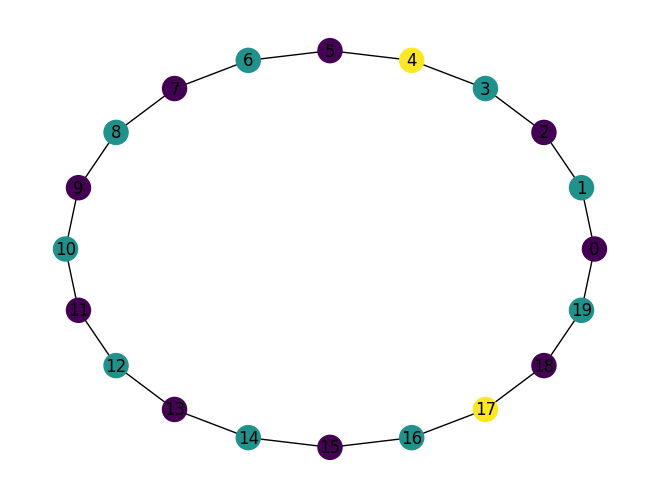

In [4]:
n=20
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))



Tester avec d'autres exemples classiques venant [du manuel de référence networkx](https://networkx.org/documentation/stable/reference/generators.html)

[6 7 0 8 4 9 2 5 1 3]


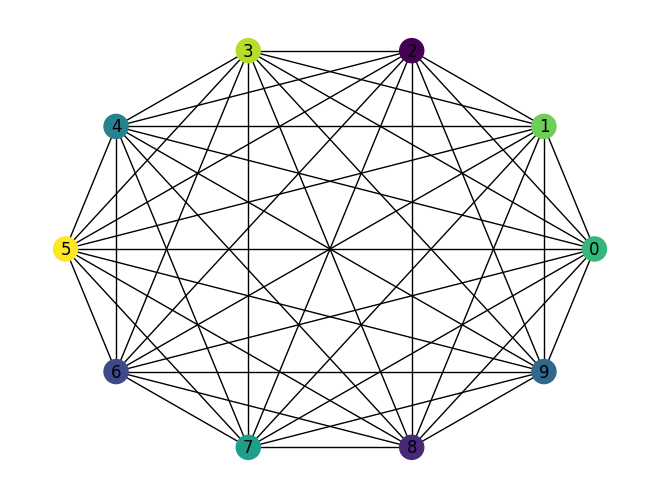

In [5]:
n=10
G=nx.generators.classic.complete_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


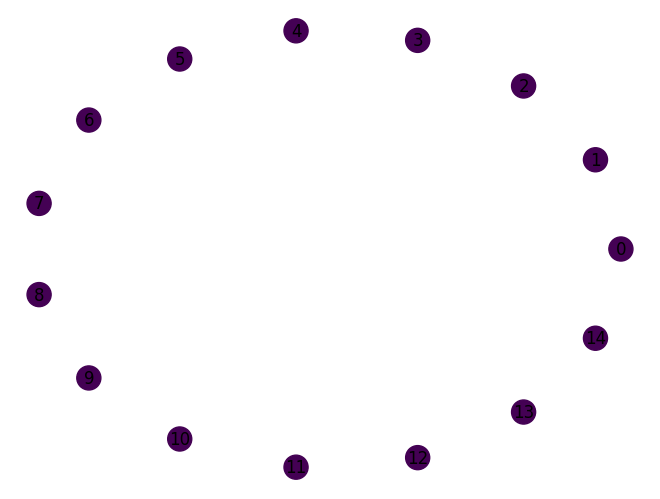

In [6]:
n=15
G=nx.generators.classic.complete_multipartite_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))

[3 1 0 2 1 0 1 0 2 1 0 1 0 1 0]


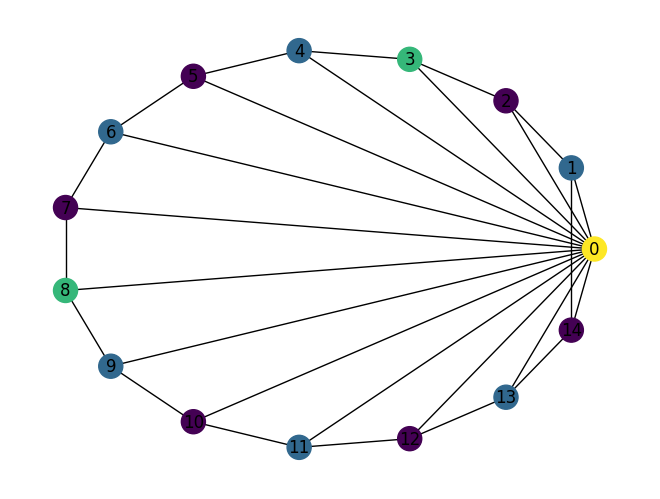

In [7]:
n=15
G=nx.generators.classic.wheel_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))

Le but de cette question est d'estimer la qualité de cette algorithme.

On se concentre sur un cas particulier, le $2n$-cycle.


**_question 2_**

Quel est le nombre chromatique de $C_{2n}$ ?

Tester sur plusieurs essais le nombre de couleurs obtenues avec l'algorithme de coloration naïve. Qu'en pensez-vous ?


[0 1]
2


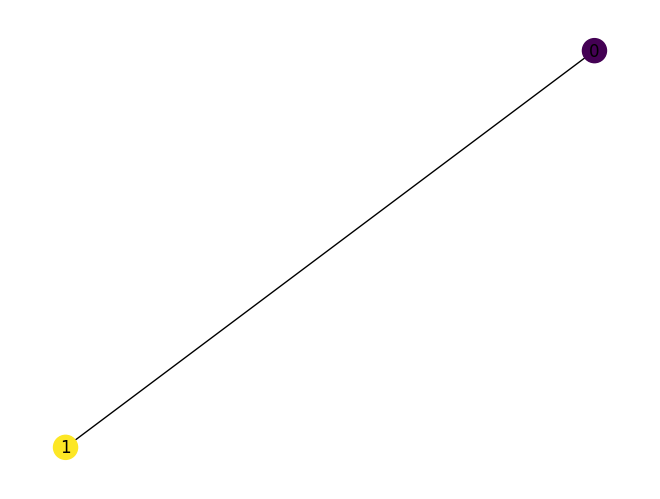

In [8]:
n=2
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))
print(len(set(C)))

[1 0 1 0]
2


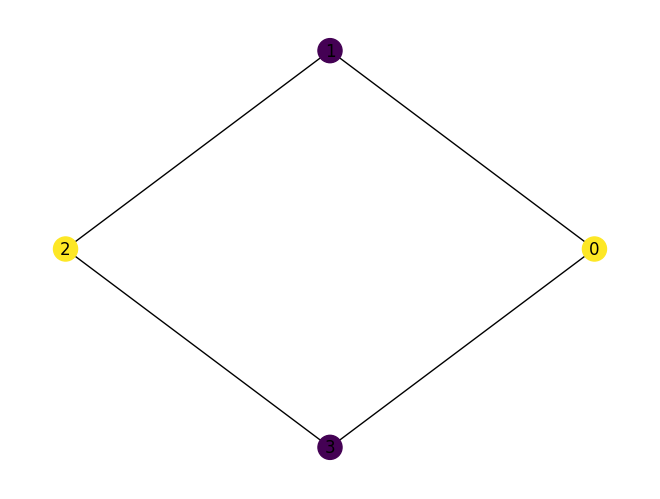

In [9]:
n=4
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))
print(len(set(C)))

[0 1 0 1 0 1]
2


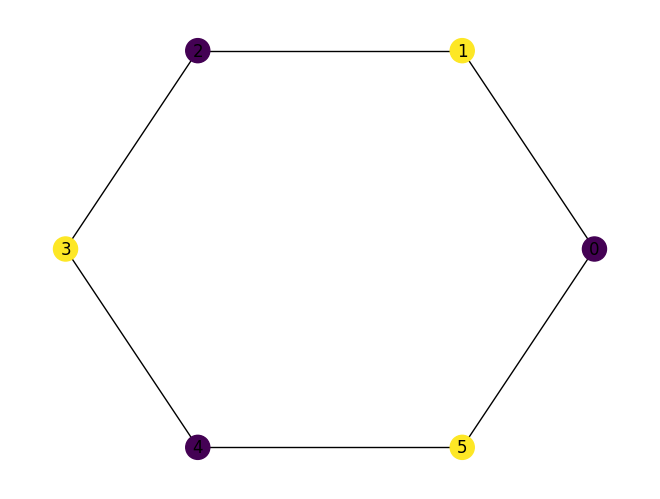

In [10]:
n=6
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))
print(len(set(C)))

[2 0 1 2 0 1 0 1 0 1 0 1 2 0 1 0 1 0 1 0 1 2 0 2 1 0 2 1 0 2 1 0 1 0 1 0 2
 1 0 1 2 0 1 0 2 1 0 1]
3


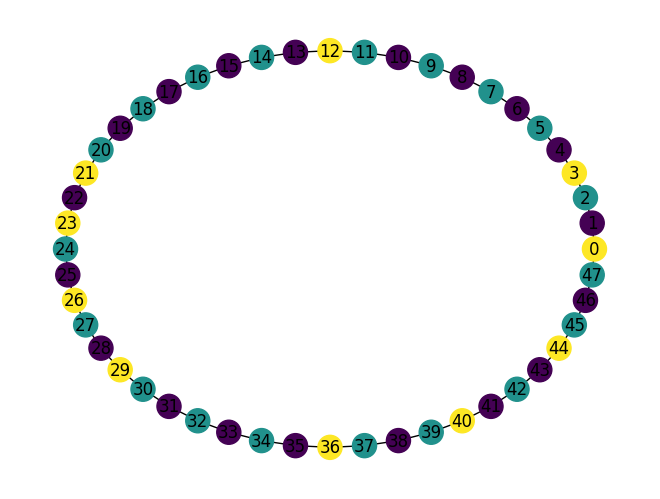

In [11]:
n=48
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))
print(len(set(C)))

[1 0 1 0 1 0 1 0 1 0 1 0 2 1 0 1 0 1 0 2 1 0 2 1 0 1 0 1 0 1 0 1 0 1 2 0 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 2 0 1 0 2 1 0 1 0 1 0 1 2 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0]
3


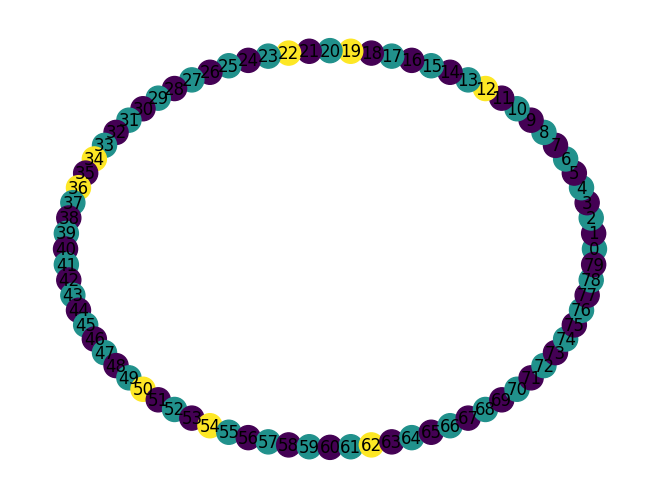

In [12]:
n=80
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))
print(len(set(C)))

_Question 2_

La coloration naïve renvoie un nombre chromatique de 2 pour un graphe $C_{2n}$, néammoins cela ne dure que pour n=2 et n=4, au-delà cela renvoie un nombre chromatique de 3. Cela est dû au fait que la coloration naïve ne prend pas en compte les sommets adjacents, et donc ne peut pas colorer correctement le graphe.

**question 3**

Tester le nombre de couleurs obtenu pour le coloriage naïf sur 5000 essais pour $C_{20}$. Pour quelle proportion est-ce optimal ? Tracer la courbe.

2.9458
[0, 0, 271, 4729]


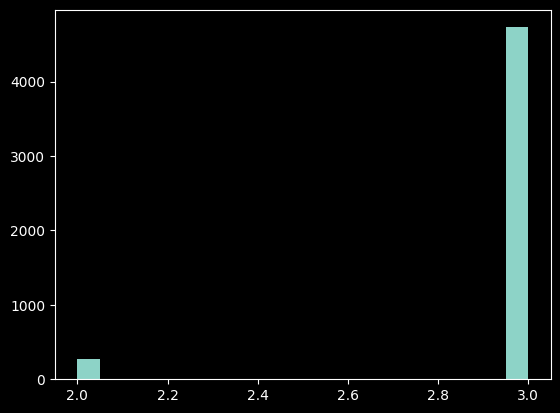

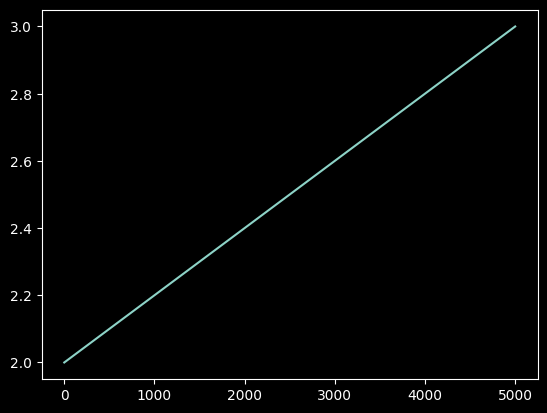

In [13]:
def count_unique(A):
	return len(set(A))

def count_values(A):
	count = []
	for i in range(max(A)+1):
		count.append(A.count(i))
	return count

def indexes(A):
	index = []
	for i in range(len(A)):
		if A[i] != 0:
			index.append(i)
	return index

n = 20
nb = 5000
count = 0
nbCol = []

for i in range(nb):
	G = nx.generators.classic.cycle_graph(n)
	A = nx.to_numpy_array(G)
	C = NaiveCol(A)
	count += count_unique(C)
	nbCol.append(count_unique(C))
count /= nb
print(count)
print(count_values(nbCol))

plt.hist(nbCol, bins = 20)
plt.show()

plt.plot([1, nb], indexes(count_values(nbCol)))
plt.show()


**question 4**

Tracer la proportion de coloriages naïf optimaux en fonction de la taille du cycle $C_{2n}$.

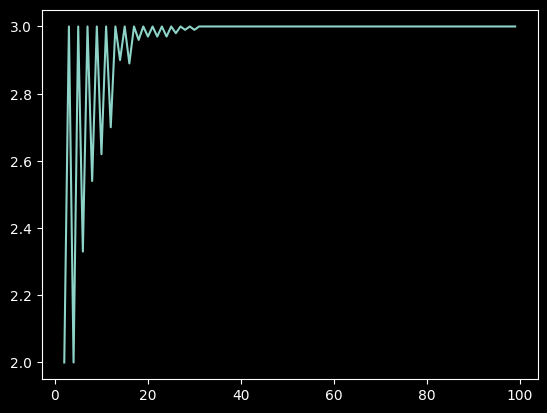

In [14]:
def draw_curve():
	nb = 100
	nbCol = []
	n = 2
	while n < nb:
		count = 0
		for i in range(nb):
			G = nx.generators.classic.cycle_graph(n)
			A = nx.to_numpy_array(G)
			C = NaiveCol(A)
			count += count_unique(C)
		count /= nb
		nbCol.append(count)
		n += 1
	plt.plot(range(2, 100), nbCol)
	plt.show()

draw_curve()

Même questions avec un graphe biparti aléatoire.

[2 2 0 2 2 2 0 0 2 2 0 0 2 2 0 2 2 0 2 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1
 0 1 1]


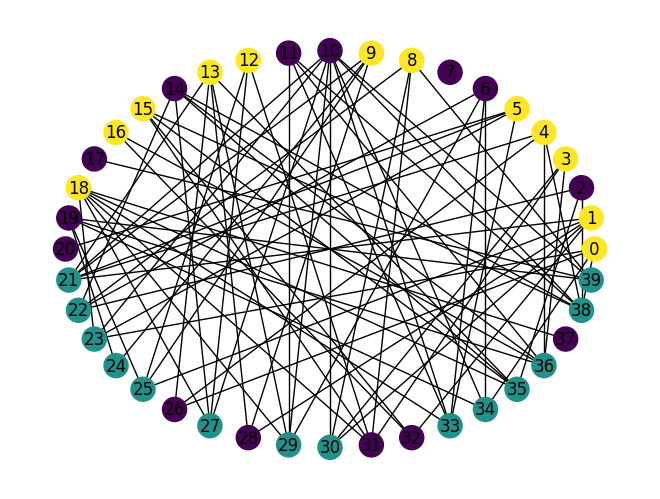

In [15]:
n=20
G=nx.algorithms.bipartite.generators.random_graph(n,n,.2)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(2*n),node_color=C,with_labels=True,pos=nx.circular_layout(G))

3.8822
[0, 0, 152, 1201, 2750, 878, 19]
[0, 0, 2, 3, 4, 5, 6]


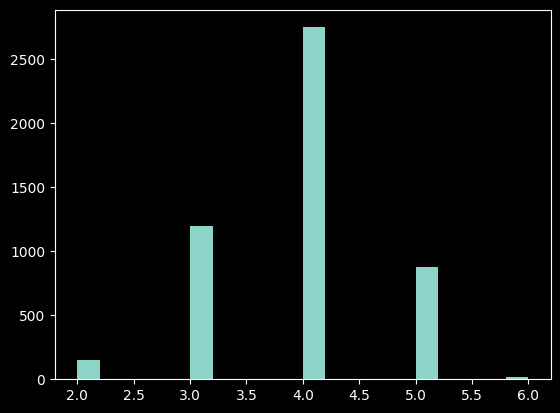

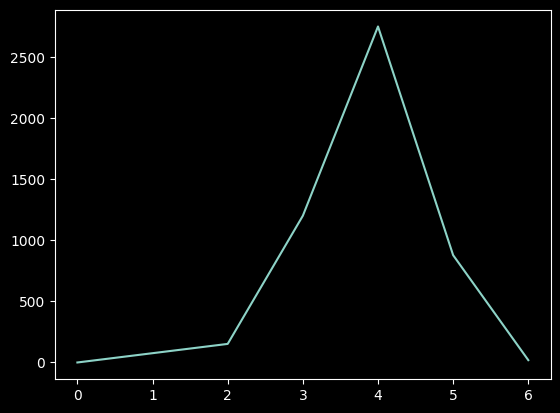

In [22]:
def count_unique(A):
	return len(set(A))

def count_values(A):
	count = []
	for i in range(max(A)+1):
		count.append(A.count(i))
	return count

def indexes(A):
	index = [0, 0]
	for i in range(len(A)):
		if A[i] != 0:
			index.append(i)
	return index

n = 20
nb = 5000
count = 0
nbCol = []

for i in range(nb):
	G = nx.algorithms.bipartite.generators.random_graph(n,n,.2)
	A = nx.to_numpy_array(G)
	C = NaiveCol(A)
	count += count_unique(C)
	nbCol.append(count_unique(C))
count /= nb
print(count)
print(count_values(nbCol))
print(indexes(count_values(nbCol)))

plt.hist(nbCol, bins = 20)
plt.show()

max_count = max(count_values(nbCol))
x_indices = range(1, max_count+1)
plt.plot(indexes(count_values(nbCol)), count_values(nbCol))
plt.show()


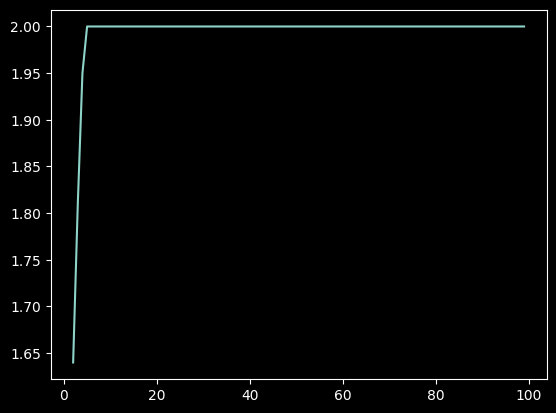

In [30]:
def neighbours(A,v):
    return np.where(A[v] == 1)[0]

def NaiveCol(A):
    n = A.shape[0]
    C = np.zeros(n, dtype=int)
    for v in range(n):
        colneigh = C[neighbours(A,v)].tolist()
        for i in range(n):
            if i not in colneigh:
                C[v] = i
                break
    return C

def count_unique(C):
    unique_colors = np.unique(C)
    nb = len(unique_colors)
    if -1 in unique_colors and 1 in unique_colors:
        nb -= 1
    return nb


def draw_curve():
    nb = 100
    nbCol = []
    n = 2
    while n < nb:
        count_list = []
        for i in range(nb):
            G = nx.algorithms.bipartite.generators.random_graph(n,n,.2)
            A = nx.to_numpy_array(G)
            C = NaiveCol(A)
            count_list.append(count_unique(C))
        count = sum(count_list)/len(count_list)
        nbCol.append(count)
        n += 1
    plt.plot(range(2, 100), nbCol)
    plt.show()

draw_curve()
